In [1]:
# Text mining
url = "https://en.wikipedia.org/wiki/Data_science"

In [2]:
# Using requests library

import requests

text = requests.get(url).content.decode("utf-8")
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"bb8af271-e58b-4bb8-9a09-69e4051f39b7","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1097977667,"wgRevisionId":1097977667,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","Comput

In [3]:
# Using the built-in HTMLParser object from python

from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data) == "" or self.script:
            return
        self.res += ' ' + data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Data science  is an  interdisciplinary  field that uses  scientific methods , processes,  algorithms  and systems to extract  knowledge  and insights from noisy, structured and  unstructured data , [1] [2]  and apply knowledge from data across a broad range of application domains. Data science is related to  data mining ,  machine learning  and  big data . [3] Data science is a "concept to unify  statistics ,  data analysis ,  informatics , and their related  methods " in order to "understand and analyse actual  phenomena " with  data . [4]  It u

In [4]:
# Using RAKE from python library for keyword extraction

import sys
!{sys.executable} -m pip install nlp_rake

In [5]:
# Setting the minimum length of a keyword to 5 characters
# maximum number of words in a keyword to 2, minimum frequency of a keyword in the document to 3

import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.9074074074074074),
 ('information science', 3.9074074074074074),
 ('computer science', 3.9074074074074074),
 ('application domains', 3.75),
 ('data analysis', 3.666666666666667),
 ('science', 1.9074074074074074),
 ('insights', 1.25),
 ('field', 1.25),
 ('statistics', 1.2380952380952381),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

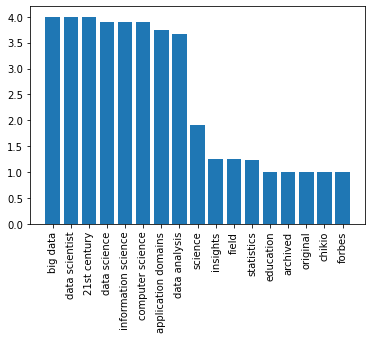

In [6]:
# Using matplotlib from python library to plot distribution of the keywords with their relevance for visualising the result

import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [7]:
# Using Word Cloud from python library to visualise word frequencies to plot word cloud from the keyword list 

!{sys.executable} -m pip install wordcloud

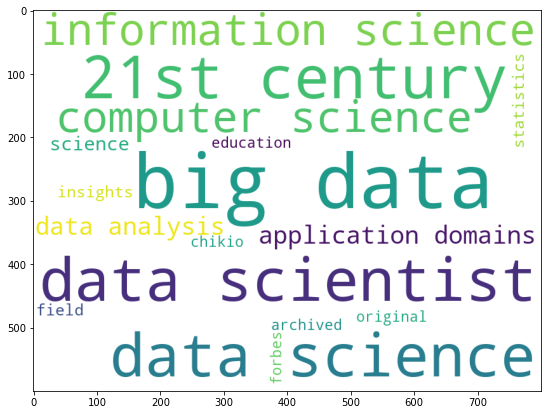

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

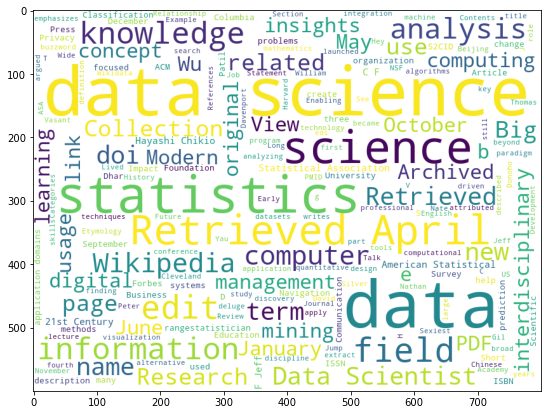

In [9]:
# Passing in the original text to WordCloud

plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [12]:
# The process of extracting meaning from Wikipedia text in the form of keywords and word cloud.
# Illustrating the importance of data pre-processing and cleaning

wc.generate(text).to_file('ds_wordcloud.png')